In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Max IOPS and size from https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/ebs-volume-types.html

MAX_SIZE_GIB = 10000
MAX_IOPS = 10000

@np.vectorize
def io1_cost(gb, io):
    if gb > 16000 or io > 64000:
        return float('inf')
    return 0.125 * gb + 0.065 * io

@np.vectorize
def gp2_cost(gb, io):
    if gb > 16000 or io > 16000:
        return float('inf')
    max_gb = max(gb, io // 3)
    return 0.10 * max_gb

@np.vectorize
def gp3_cost(gb, io):
    if gb > 16000 or io > 16000:
        return float('inf')
    space_cost = 0.08 * gb
    if (io > 3000):
        return space_cost + 0.005 * (io - 3000)
    return space_cost

@np.vectorize
def io2_cost(gb, io):
    # Let's not consider block express now
    if gb > 16000 or io > 64000:
        return float('inf')
    space_cost = 0.125 * gb
    io_cost = max(io, 32000) * 0.065
    if io > 32000:
        io_cost += (io - 32000) * 0.46
    # We shouldn't go to the third tier
    return space_cost + io_cost

gbs = np.linspace(0,  MAX_SIZE_GIB)
ios = np.linspace(100, MAX_IOPS)
X, Y = np.meshgrid(gbs, ios)
results = {
    "gp2": gp2_cost(X, Y),
    "io1": io1_cost(X, Y),
    "gp3": gp3_cost(X, Y),
    "io2": io2_cost(X, Y),
}

# Never buy IO1

AWS io1 is strictly dominated in cost by gp2

<IPython.core.display.Javascript object>


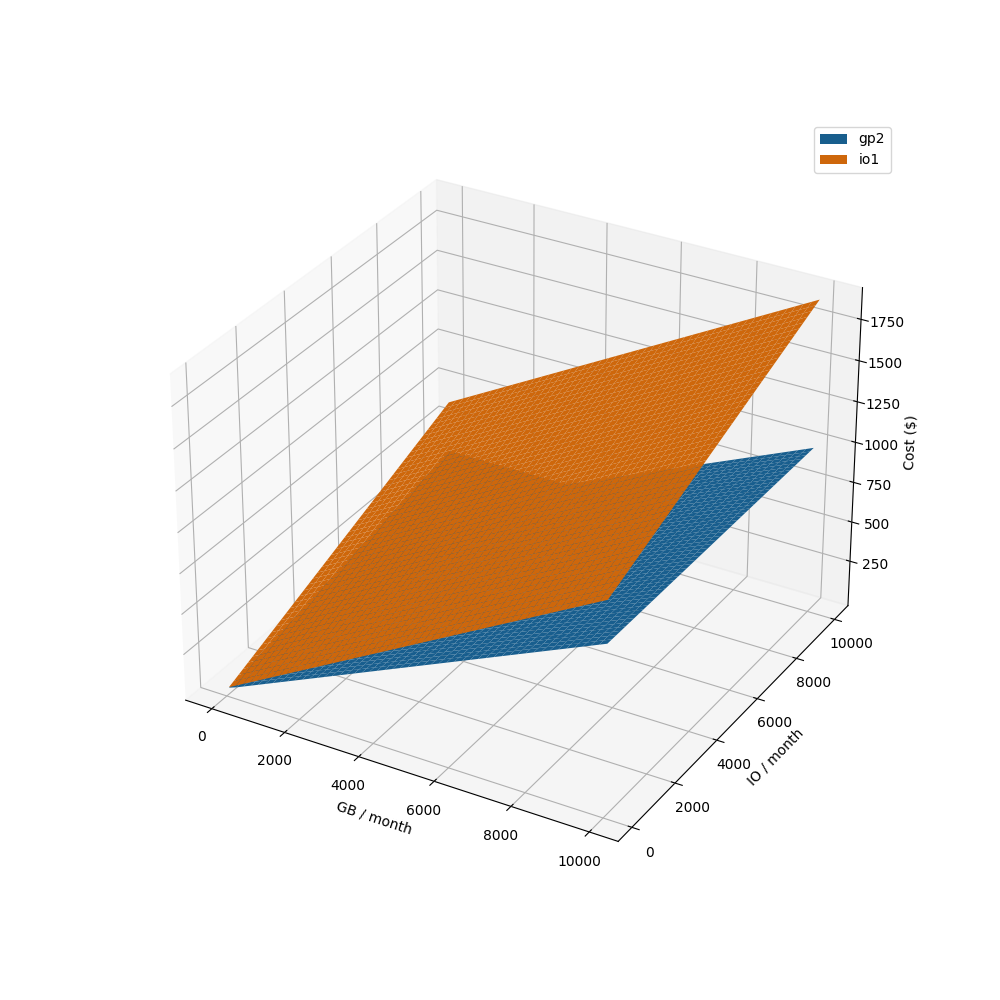

In [2]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
for label, z in results.items():
    if label not in ("gp2", "io1"):
        continue
    surf = ax.plot_surface(X, Y, z, antialiased=True, label=label)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d

ax.set_xlabel('GB / month')
ax.set_ylabel('IO / month')
ax.set_zlabel('Cost ($)')
ax.legend()
plt.show()

# GP3 is just Cheap GP2

GP3 is just cheaper GP2. The steady state IO performance of gp2 though is lower latency (data coming)

<IPython.core.display.Javascript object>


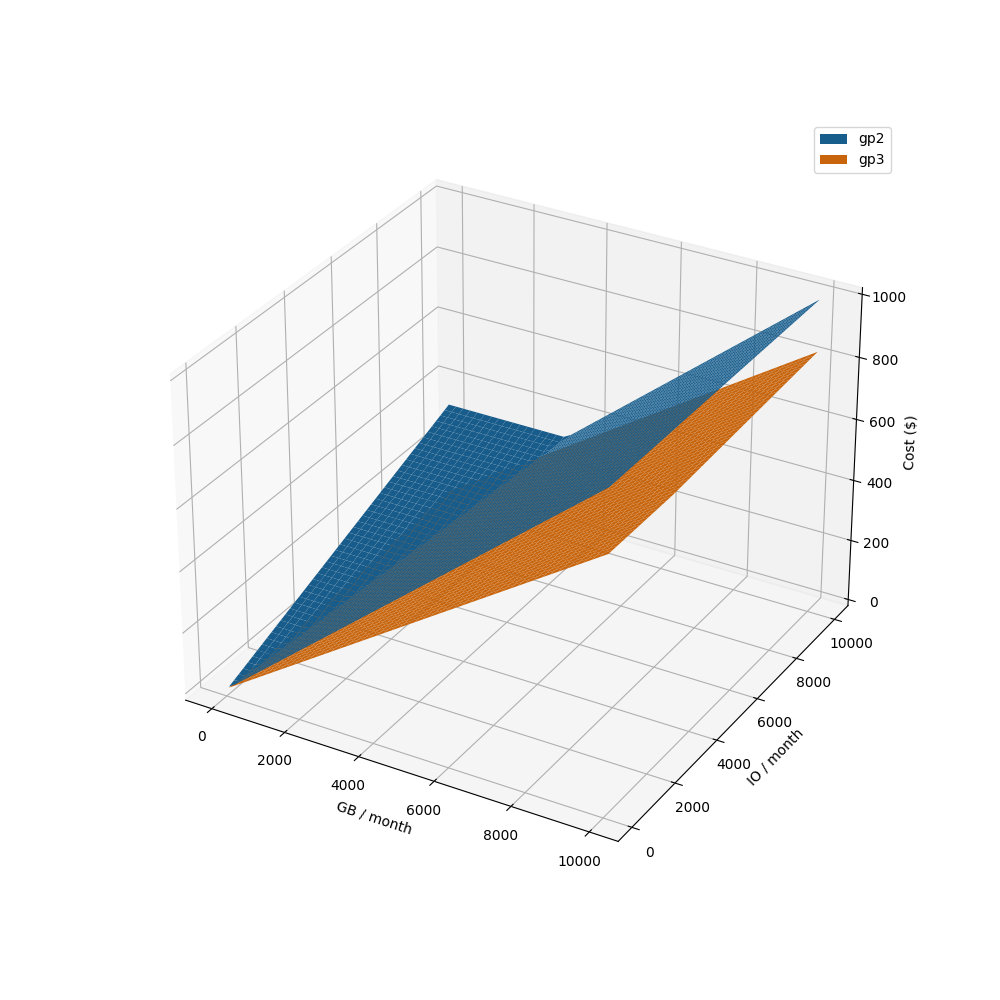

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
for label, z in results.items():
    if label not in ("gp2", "gp3"):
        continue
    surf = ax.plot_surface(X, Y, z, antialiased=True, label=label)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d

ax.set_xlabel('GB / month')
ax.set_ylabel('IO / month')
ax.set_zlabel('Cost ($)')
ax.legend()
plt.show()

# IO2 is expensive

IO2 is pretty expensive for IO relative to gp2

<IPython.core.display.Javascript object>


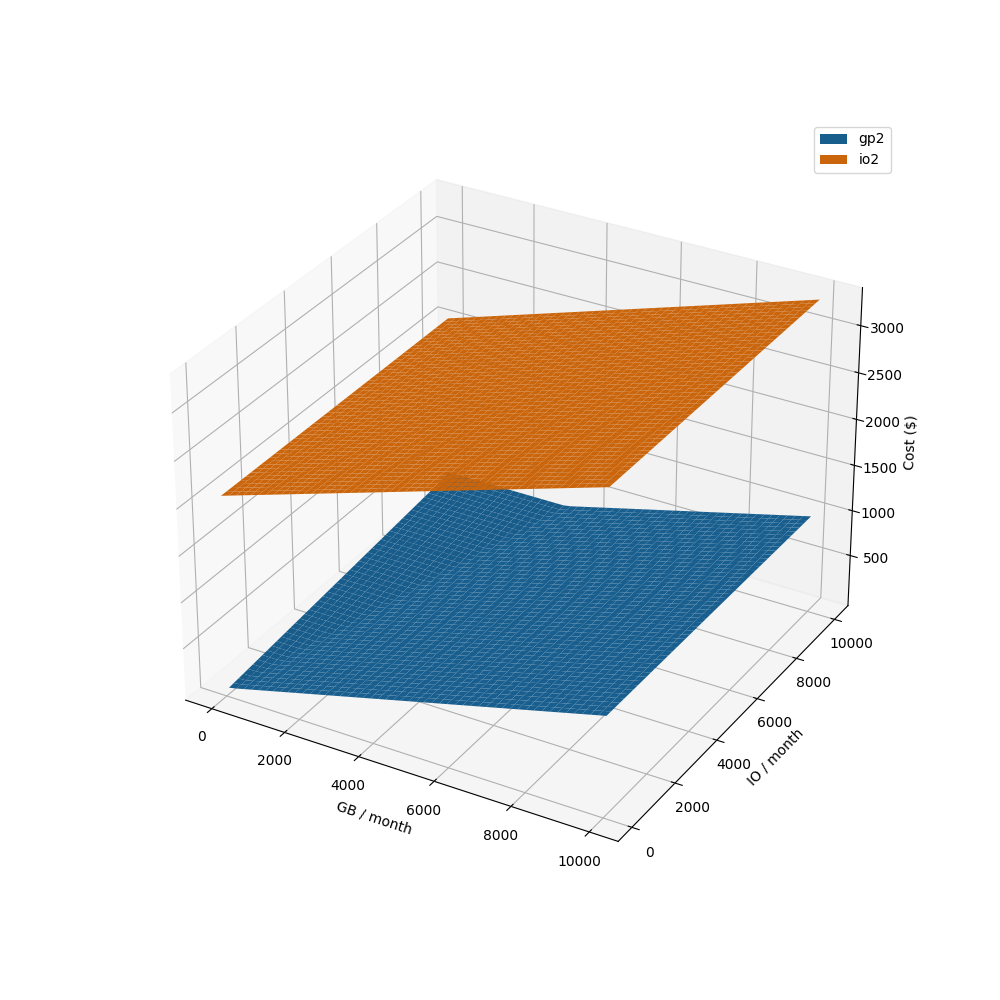

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
for label, z in results.items():
    if label not in ("gp2", "io2"):
        continue
    surf = ax.plot_surface(X, Y, z, antialiased=True, label=label)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d

ax.set_xlabel('GB / month')
ax.set_ylabel('IO / month')
ax.set_zlabel('Cost ($)')
ax.legend()
plt.show()